In [68]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import time, sys
from IPython.display import clear_output, display
from time import sleep
import random
from tabulate import tabulate

In [2]:
%run -i ./Classes.ipynb

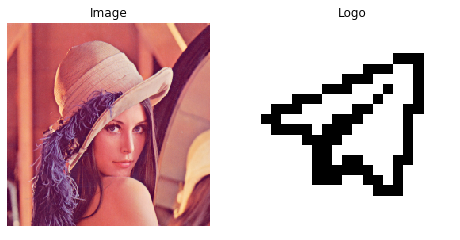

In [44]:
# Load
ori_img = cv2.imread('./assets/lena.png') #BGR
ori_logo = cv2.imread('./assets/paperplane.png', 0)

image_size = 256
logo_size = 20

# Initialize
my_image = Image(ori_img, image_size)
my_logo = Logo(ori_logo, logo_size)

ImageUtil.show([[my_image.image, my_logo.logo]], [['Image', 'Logo']])

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

PSNR = 31.898500046195743


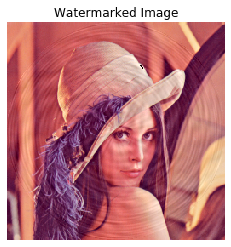

In [45]:
# Watermarker
riw = RIW(image_size, logo_size, 36, 0.5, 16)

# Embed
img_y_watermarked = riw.embed(my_image.get_y(), my_logo.logo)

w_image = Image.copy(my_image)
w_image.set_y(img_y_watermarked)

print('PSNR = {}'.format(ImageUtil.psnr(my_image.image, w_image.image)))

ImageUtil.show1(w_image.image, 'Watermarked Image')

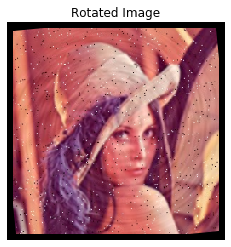

In [46]:
# Attack

attacked_image = np.copy(w_image.image)
attacked_image = Attacker.attackFilterGauss(attacked_image, 3)
attacked_image = Attacker.attackNoiseSaltPepper(attacked_image, 0.01)
attacked_image = Attacker.attackJPG(attacked_image, 90)
attacked_image = Attacker.attackRotate(attacked_image, 5)
attacked_image = Attacker.attackCrop(attacked_image, 0.03, 0.03, 0.03, 0.03)

a_image = Image(attacked_image, w_image.image_size)

ImageUtil.show1(a_image.image, 'Rotated Image')

'Transform PCET: [####################] 100.0%'

BER = 10.00%


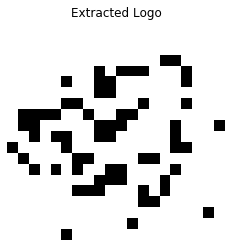

In [47]:
logo_extracted = riw.extract(a_image.get_y())

print('BER = {:.2%}'.format(ImageUtil.ber(my_logo.logo, logo_extracted)))

ImageUtil.show1(logo_extracted, 'Extracted Logo')

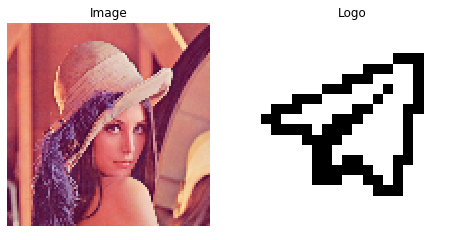

In [74]:
n = 256
g = 20
p = 2 * g
d = 0.5
step = 20

test_image = Image(ori_img, n)
test_logo = Logo(ori_logo, g)

ImageUtil.show([[test_image.image, test_logo.logo]], [['Image', 'Logo']])

In [75]:
table_headers = ['N', 'G', 'P', 'D', 'PSNR', 'BER']

def multiple_attack(image):
    attacked_image = np.copy(image)
    attacked_image = Attacker.attackFilterGauss(attacked_image, 3)
    attacked_image = Attacker.attackNoiseSaltPepper(attacked_image, 0.01)
    attacked_image = Attacker.attackJPG(attacked_image, 90)
    attacked_image = Attacker.attackRotate(attacked_image, 5)
    attacked_image = Attacker.attackCrop(attacked_image, 0.03, 0.03, 0.03, 0.03)
    return attacked_image

In [76]:
test_d = []
for dd in [0.2, 0.4, 0.6, 0.8, 1]:
    
    # Initialize
    test_image = Image(ori_img, n)
    test_logo = Logo(ori_logo, g)
    
    # Create Watermarker
    temp_riw = RIW(n, g, 2 * g, dd, step)
    
    # Embed
    img_y_watermarked = temp_riw.embed(test_image.get_y(), test_logo.logo)
    watermarked_image = Image.copy(test_image)
    watermarked_image.set_y(img_y_watermarked)

    # Calculate PSNR
    psnr = ImageUtil.psnr(test_image.image, watermarked_image.image)
    
    # Attack
    attacked_image = Image(multiple_attack(watermarked_image.image), n)
    
    # Extract
    logo_extracted = temp_riw.extract(attacked_image.get_y())
    
    # Calculate BER
    ber = ImageUtil.ber(test_logo.logo, logo_extracted)
    
    test_d.append((n, g, p, dd, psnr, ber))

print(tabulate(test_d, headers=table_headers))

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

  N    G    P    D     PSNR     BER
---  ---  ---  ---  -------  ------
100   20   40  0.2  36.3077  0.485
100   20   40  0.4  32.5507  0.3375


In [77]:
test_g = []
for gg in [12, 20, 28, 36]:
    
    # Initialize
    test_image = Image(ori_img, n)
    test_logo = Logo(ori_logo, gg)
    
    # Create Watermarker
    temp_riw = RIW(n, gg, 2 * gg, d, step)
    
    # Embed
    img_y_watermarked = temp_riw.embed(test_image.get_y(), test_logo.logo)
    watermarked_image = Image.copy(test_image)
    watermarked_image.set_y(img_y_watermarked)

    # Calculate PSNR
    psnr = ImageUtil.psnr(test_image.image, watermarked_image.image)
    
    # Attack
    attacked_image = Image(multiple_attack(watermarked_image.image), n)
    
    # Extract
    logo_extracted = temp_riw.extract(attacked_image.get_y())
    
    # Calculate BER
    ber = ImageUtil.ber(test_logo.logo, logo_extracted)
    
    test_g.append((n, gg, p, d, psnr, ber))
    
print(tabulate(test_g, headers=table_headers))

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

  N    G    P    D     PSNR       BER
---  ---  ---  ---  -------  --------
100   12   40  0.5  33.985   0.409722
100   20   40  0.5  31.7892  0.3
100   28   40  0.5  30.6697  0.272959
100   36   40  0.5  30.0311  0.303241


In [78]:
test_n = []
for nn in [128, 256, 384, 512]:
    
    # Initialize
    test_image = Image(ori_img, nn)
    test_logo = Logo(ori_logo, g)
    
    # Create Watermarker
    temp_riw = RIW(nn, g, 2 * g, d, step)
    
    # Embed
    img_y_watermarked = temp_riw.embed(test_image.get_y(), test_logo.logo)
    watermarked_image = Image.copy(test_image)
    watermarked_image.set_y(img_y_watermarked)

    # Calculate PSNR
    psnr = ImageUtil.psnr(test_image.image, watermarked_image.image)
    
    # Attack
    attacked_image = Image(multiple_attack(watermarked_image.image), nn)
    
    # Extract
    logo_extracted = temp_riw.extract(attacked_image.get_y())
    
    # Calculate BER
    ber = ImageUtil.ber(test_logo.logo, logo_extracted)
    
    test_n.append((n, gg, p, d, psnr, ber))
    
print(tabulate(test_n, headers=table_headers))

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

'Inverse PCET: [####################] 100.0%'

'Transform PCET: [####################] 100.0%'

  N    G    P    D     PSNR       BER
---  ---  ---  ---  -------  --------
100   12   40  0.5  33.985   0.409722
100   20   40  0.5  31.7892  0.3
100   28   40  0.5  30.6697  0.272959
100   36   40  0.5  30.0311  0.303241
